<a href="https://colab.research.google.com/github/LestyMV/Final-assignment---CO2-emissions/blob/main/Final_assignment_CO2_emissions_Part_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**3.** Which non-fossil fuel energy technology will have the best price in the future?

To be able to predict prices you'll probably need to use linear regression over the various non-fossil fuel options.

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
import numpy.polynomial.polynomial as poly



In [ ]:
# Make a usable dataframe of all dataframes
base_url = 'https://raw.githubusercontent.com/LestyMV/Final-assignment---CO2-emissions/main/'

# Import urls
url_co2 = f'{base_url}annual-co-emissions-by-region.csv'
url_gdp = f'{base_url}gdp-per-capita-maddison-2020.csv'
url_food = f'{base_url}global-food.csv'
url_pov = f'{base_url}the-share-and-number-of-people-living-in-extreme-poverty.csv'
url_hdi = f'{base_url}human-development-index.csv'
url_energy = f'{base_url}energy-consumption-by-source-and-country.csv'
url_pop_dens = f'{base_url}population-density-vs-prosperity.csv'
url_agri_land = f'{base_url}share-of-land-area-used-for-agriculture.csv'
url_industry = f'{base_url}industry-share-of-total-emplyoment.csv'
url_urban_rural = f'{base_url}urban-and-rural-population.csv'
url_gini =  f'{base_url}economic-inequality-gini-index.csv'
url_agri_out = f'{base_url}agricultural-output-dollars.csv'
url_gni = f'{base_url}gross-national-income-per-capita.csv'
url_energy_price = f'{base_url}levelized-cost-of-energy.csv'



In [ ]:
# Read urls
df_co2 = pd.read_csv(url_co2)
df_gdp = pd.read_csv(url_gdp)
df_food = pd.read_csv(url_food)
df_pov = pd.read_csv(url_pov)
df_hdi = pd.read_csv(url_hdi)
df_energy = pd.read_csv(url_energy)
df_density = pd.read_csv(url_pop_dens)
df_agri_land = pd.read_csv(url_agri_land)
df_industry = pd.read_csv(url_industry)
df_urban_rural = pd.read_csv(url_urban_rural)
df_gini = pd.read_csv(url_gini)
df_agri_out = pd.read_csv(url_agri_out)
df_gni = pd.read_csv(url_gni)
df_energy_price = pd.read_csv(url_energy_price)

In [ ]:
# Rename columns
df_co2 = df_co2.rename(columns = {'Entity':'Country', 
                                  'Annual CO₂ emissions (zero filled)': 'Annual CO₂ emissions (t/py)'})
df_gdp = df_gdp.rename(columns = {'Entity':'Country', 
                                  'GDP per capita': 'GDP pc'})
df_food = df_food.rename(columns = {'Food supply (kcal per capita per day)': 'Food supply (kcal/pc/pd)'})
df_pov = df_pov.rename(columns = {'Entity':'Country', 
                                  '$2.15 a day - share of population below poverty line': 'Share of pop < poverty line'})
df_hdi = df_hdi.rename(columns = {'Entity':'Country', 
                                  'Human Development Index': 'HDI'})
df_energy = df_energy.rename(columns = {'Entity':'Country', 
                                        'Geo Biomass Other - TWh (zero filled)': 'Biomass TWh', 
                                        'Biofuels Consumption - TWh - Total (zero filled)': 'Biofuels TWh', 
                                        'Solar Consumption - TWh (zero filled)': 'Solar TWh', 
                                        'Wind Consumption - TWh (zero filled)': 'Wind TWh', 
                                        'Hydro Consumption - TWh (zero filled)': 'Hydro TWh', 
                                        'Nuclear Consumption - TWh (zero filled)': 'Nuclear TWh', 
                                        'Gas Consumption - TWh (zero filled)': 'Gas TWh', 
                                        'Coal Consumption - TWh (zero filled)': 'Coal TWh', 
                                        'Oil Consumption - TWh (zero filled)': 'Oil TWh'})
df_density = df_density.rename(columns = {'Entity':'Country'})
df_agri_land = df_agri_land.rename(columns = {'Entity':'Country'})
df_industry = df_industry.rename(columns = {'Entity':'Country', 
                                            'Industry as % of total employment -- ILO modelled estimates, May 2017': 'Industry (% of total employment)'})
df_urban_rural = df_urban_rural.rename(columns = {'Entity':'Country'})
df_gini = df_gini.rename(columns = {'Entity':'Country', 
                                    'Gini coefficient': 'Gini'})
df_agri_out = df_agri_out.rename(columns = {'Entity':'Country', 
                                            'output_quantity': 'Agri output $'})
df_gni = df_gni.rename(columns = {'Entity':'Country', 
                                  'GNI per capita, PPP (constant 2017 international $)': 'GNI'})
df_energy_price = df_energy_price.rename(columns = {'Bioenergy levelized cost of energy': 'Bioenergy', 
                                                    'Geothermal levelized cost of energy': 'Geothermal energy', 
                                                    'Offshore wind levelized cost of energy': 'Offshore wind power', 
                                                    'Solar photovoltaic levelized cost of energy': 'Solar photovoltaic power', 
                                                    'Concentrated solar power levelized cost of energy': 'Concentrated solar power', 
                                                    'Hydropower levelized cost of energy': 'Hydropower', 
                                                    'Onshore wind levelized cost of energy': 'Onshore wind power'})

In [ ]:
# Recalculate columns
df_urban_rural['Total population'] = df_urban_rural['Urban population'] + df_urban_rural['Rural population']
df_urban_rural['Urban (% of total)'] = df_urban_rural['Urban population'] / df_urban_rural['Total population'] * 100
df_urban_rural['Rural (% of total)'] = df_urban_rural['Rural population'] / df_urban_rural['Total population'] * 100
df_energy['Renewable TWh'] = df_energy['Biomass TWh'] + df_energy['Biofuels TWh'] + df_energy['Solar TWh'] + df_energy['Wind TWh'] + df_energy['Hydro TWh']
df_energy['Fossil TWh'] = df_energy['Gas TWh'] + df_energy['Coal TWh'] + df_energy['Oil TWh']
df_co2['Annual CO₂ emissions (kg/py)'] = df_co2['Annual CO₂ emissions (t/py)'] * 1000

In [ ]:
# Only select the data for world, drop column 'Code' and reset index and fill one missing value in Geothermal series
df_energy_price = df_energy_price.drop(columns = 'Code')
df_energy_price = df_energy_price.groupby(['Entity','Year'], as_index=True).first()
df_energy_world = df_energy_price.loc['World'].reset_index()
df_energy_world.loc[28,'Geothermal energy'] = (df_energy_world.loc[27,'Geothermal energy'] + df_energy_world.loc[29,'Geothermal energy']) / 2
print('Dataframe with relevant values for analysis of question 3 (df_energy_world)')
display(df_energy_world)
print('\n')

KeyError: ignored

In [ ]:
# Show plot with linear regression line for current and future (and past) years
# Calculate linear regression (x and y are different for most columns, because not all columns have values for all years)
x  = df_energy_world.loc[27:, 'Year'] # Bioenergy, Solar photovoltaic power, Concentrated solar power, Hydropower
x2 = df_energy_world.loc[24:, 'Year'] # Geothermal energy
x3 = df_energy_world.loc[17:, 'Year'] # offshore wind power
x4 = df_energy_world.loc[:, 'Year'] # Onshore wind power

y1 = df_energy_world.loc[27:, 'Bioenergy']
y2 = df_energy_world.loc[24:, 'Geothermal energy']
y3 = df_energy_world.loc[27:, 'Solar photovoltaic power']
y4 = df_energy_world.loc[27:, 'Concentrated solar power']
y5 = df_energy_world.loc[17:, 'Offshore wind power']
y6 = df_energy_world.loc[:, 'Onshore wind power']
y7 = df_energy_world.loc[27:, 'Hydropower']



In [ ]:
reg1 = np.polyfit(x , y1, deg=1) # Bioenergy
reg2 = np.polyfit(x2, y2, deg=1) # Geothermal energy
reg3 = np.polyfit(x , y3, deg=1) # Solar photovoltaic power
reg4 = np.polyfit(x , y4, deg=1) # Concentrated solar power
reg5 = np.polyfit(x3, y5, deg=1) # Offshore wind power
reg6 = np.polyfit(x4, y6, deg=1) # Onshore wind power
reg7 = np.polyfit(x , y7, deg=1) # Hydropower

<ipython-input-27-1b95ee629e1c>:27: MatplotlibDeprecationWarning: Passing the emit parameter of set_xlim() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  plt.xlim(1983, 2050, 1)


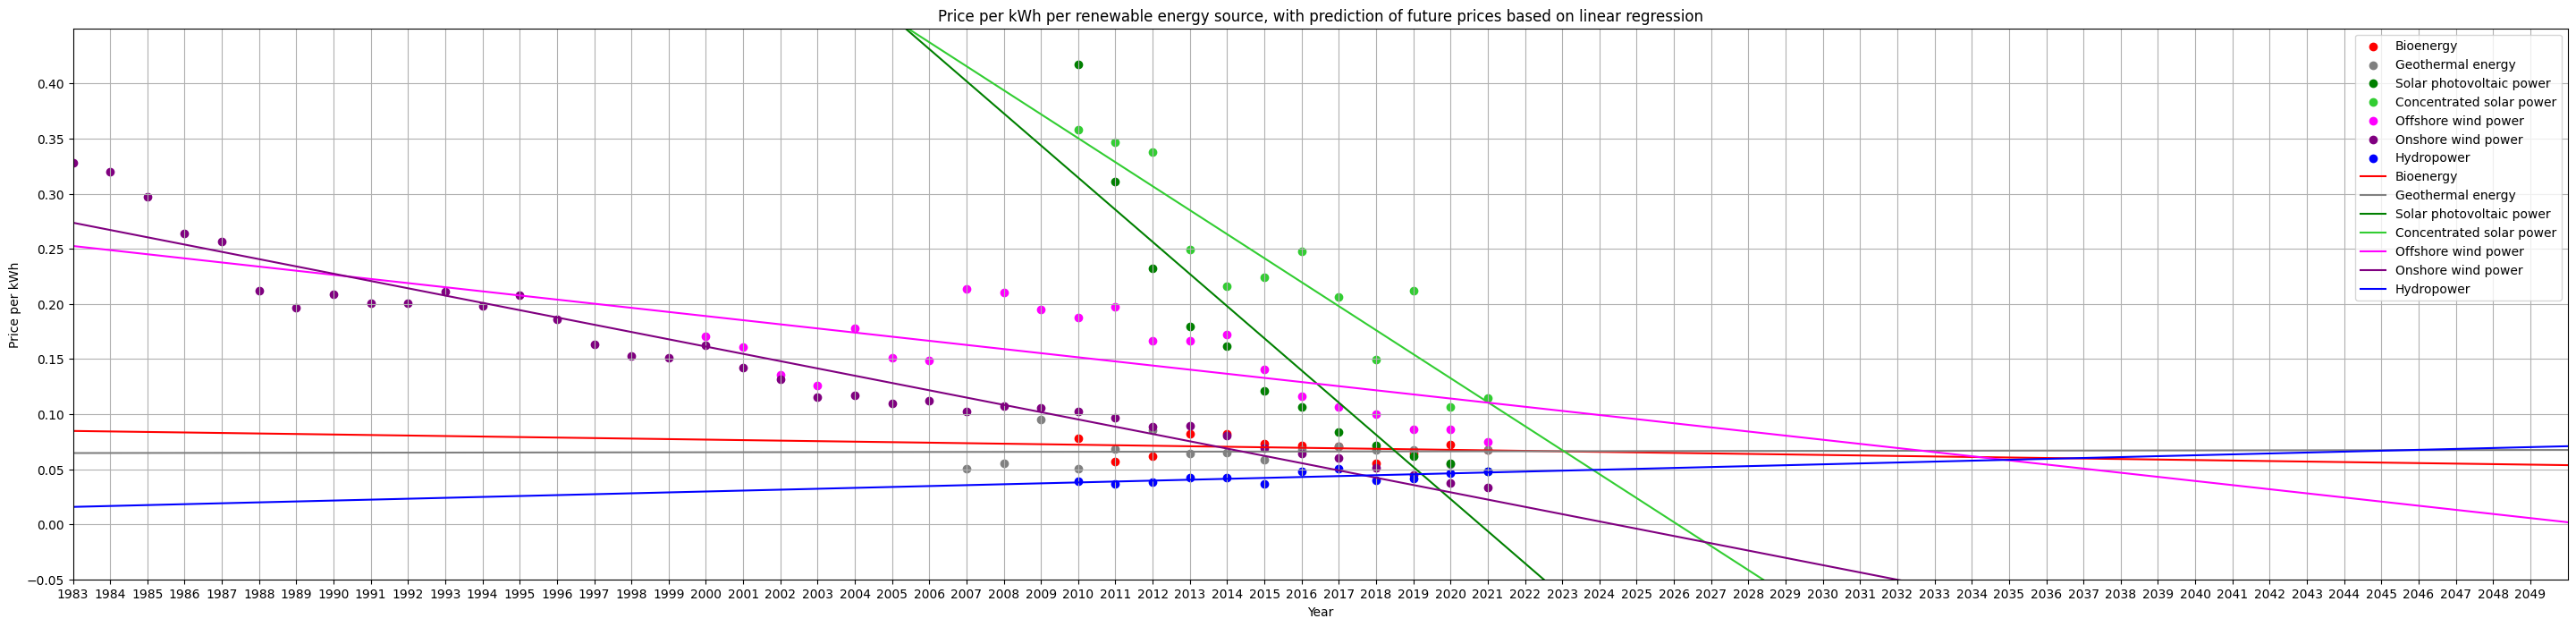



********************************************************************************
End of question N3
********************************************************************************


In [ ]:
# create plots
plt.figure(figsize=(36, 8))

# Create scatter for current values
plt.scatter(x , y1, c='red', label='Bioenergy')
plt.scatter(x2, y2, c='grey', label='Geothermal energy')
plt.scatter(x , y3, c='green', label='Solar photovoltaic power')
plt.scatter(x , y4, c='limegreen', label='Concentrated solar power')
plt.scatter(x3, y5, c='fuchsia', label='Offshore wind power')
plt.scatter(x4, y6, c='purple', label='Onshore wind power')
plt.scatter(x , y7, c='blue', label='Hydropower')

# Create linear regression line for future values with same set of colors as scatterplot of current values
xn = np.linspace(1983, 2050, 68) 
plt.plot(xn, np.polyval(reg1, xn), c='red', label='Bioenergy')
plt.plot(xn, np.polyval(reg2, xn), c='grey', label='Geothermal energy')
plt.plot(xn, np.polyval(reg3, xn), c='green', label='Solar photovoltaic power')
plt.plot(xn, np.polyval(reg4, xn), c='limegreen', label='Concentrated solar power')
plt.plot(xn, np.polyval(reg5, xn), c='fuchsia', label='Offshore wind power')
plt.plot(xn, np.polyval(reg6, xn), c='purple', label='Onshore wind power')
plt.plot(xn, np.polyval(reg7, xn), c='blue', label='Hydropower')

plt.yticks(np.arange(-0.05, 0.45, step=0.05))
plt.ylim(-0.05, 0.45)
plt.ylabel('Price per kWh')
plt.xticks(range(1983, 2050))
plt.xlim(1983, 2050, 1)
plt.xlabel('Year')
plt.title('Price per kWh per renewable energy source, with prediction of future prices based on linear regression')
plt.legend()
plt.grid()
plt.show()

def print_separator(sep, num, msg):
  print("\n")
  print(sep * num)
  print(f"{msg}")
  print(sep * num)

long_separator_amount = 80
print_separator("*", long_separator_amount, f"End of question N3")